# Gasolina Superior con aditivo y Gasolina Superior

In [1]:
import pandas as pd
# Leer la primer hoja del archivo .xls y cargar los datos en un DataFrame
df = pd.read_excel("Precios-Mensuales-promedio-combustibles-Ciudad-de-Guatemala-mayo-2023-SERVICIO-COMPLETO.xlsx", skiprows=[0])
#df_copy = df.copy()

In [2]:
# eliminamos la columna 1 y 6 de df
df.reset_index(drop=True, inplace=True)
df.drop(df.columns[[1, 6]], axis=1, inplace=True)

In [3]:
# separamos el dataframe anterior en dos dataframes, uno para los datos de la gasolina superior con aditivio
# otro para los datos de la gasolina superior
gasolina_superior_con_aditivo = df.iloc[0:12]
gasolina_superior = df.iloc[15:27]

In [4]:
# quitamos los na de gasolina_superior_con_aditivo usando ffill
last_col_index = len(df.columns) - 1
gasolina_superior_con_aditivo.iloc[:, 1:last_col_index] = gasolina_superior_con_aditivo.iloc[:, 1:last_col_index].fillna(method='ffill', axis=1)

/var/folders/04/fryprmks7_573d9qxr1s6bjh0000gn/T/ipykernel_997/338672007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasolina_superior_con_aditivo.iloc[:, 1:last_col_index] = gasolina_superior_con_aditivo.iloc[:, 1:last_col_index].fillna(method='ffill', axis=1)


In [5]:
# creamos una lista con los anos 2001-2023 y los meses
anos = list(range(2001, 2024))
print(list(range(0, 12)))
meses = list(range(1, 13))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [6]:
# convertimos al formato ano-mes
# creamos dos listas para guardar la fecha y el respectivo precio
fechas = []
precios = []
# recorremos un ciclo con los 23 anos del dataframe
for i in range(1, 24):
    # recorremos los 12 meses del ano
    for j in range(0, 12):
        # Append the data to the lists
        fechas.append(str(anos[i - 1]) + "-" + str(meses[j]))
        precios.append(gasolina_superior_con_aditivo.iloc[j, i])

# Create a new dataframe with the collected data
datos_gas_sup_ad = pd.DataFrame({'Fecha': fechas, 'Precio': precios})

# Display the new dataframe
print(datos_gas_sup_ad)



       Fecha  Precio
0     2001-1   14.92
1     2001-2   15.17
2     2001-3   14.97
3     2001-4   14.91
4     2001-5   16.26
..       ...     ...
271   2023-8     NaN
272   2023-9     NaN
273  2023-10     NaN
274  2023-11     NaN
275  2023-12     NaN

[276 rows x 2 columns]


In [7]:
# quitamos los na del dataframe usando el metodo forward fill
last_col_index = len(df.columns) - 1
gasolina_superior.iloc[:, 1:last_col_index] = gasolina_superior.iloc[:, 1:last_col_index].fillna(method='ffill', axis=1)

/var/folders/04/fryprmks7_573d9qxr1s6bjh0000gn/T/ipykernel_997/2790064757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasolina_superior.iloc[:, 1:last_col_index] = gasolina_superior.iloc[:, 1:last_col_index].fillna(method='ffill', axis=1)


In [8]:
# Convertimos al formato ano-mes
# creamos dos listas para guardar la fecha y el respectivo precio
fechas2 = []
precios2 = []

# recorremos un ciclo con los 23 anos del dataframe
for i in range(1, 24):
    # recorremos los 12 meses del ano
    for j in range(0, 12):
        # Append the data to the lists
        fechas2.append(str(anos[i - 1]) + "-" + str(meses[j]))
        precios2.append(gasolina_superior.iloc[j, i])

# Create a new dataframe with the collected data
datos_gas_sup = pd.DataFrame({'Fecha': fechas2, 'Precio': precios2})

# Display the new dataframe
print(datos_gas_sup)

       Fecha  Precio
0     2001-1   14.41
1     2001-2   14.66
2     2001-3   14.49
3     2001-4   14.46
4     2001-5   15.76
..       ...     ...
271   2023-8     NaN
272   2023-9     NaN
273  2023-10     NaN
274  2023-11     NaN
275  2023-12     NaN

[276 rows x 2 columns]


In [9]:
datos_gas_sup_ad['Fecha'] = pd.to_datetime(datos_gas_sup_ad['Fecha'], format='%Y-%m')

# Display the updated dataframe
print(datos_gas_sup_ad)

         Fecha  Precio
0   2001-01-01   14.92
1   2001-02-01   15.17
2   2001-03-01   14.97
3   2001-04-01   14.91
4   2001-05-01   16.26
..         ...     ...
271 2023-08-01     NaN
272 2023-09-01     NaN
273 2023-10-01     NaN
274 2023-11-01     NaN
275 2023-12-01     NaN

[276 rows x 2 columns]


In [10]:
datos_gas_sup_ad.fillna(method='ffill')

,Fecha,Precio
0,2001-01-01,14.92
1,2001-02-01,15.17
2,2001-03-01,14.97
3,2001-04-01,14.91
4,2001-05-01,16.26
...,...,...
271,2023-08-01,35.43
272,2023-09-01,35.43
273,2023-10-01,35.43
274,2023-11-01,35.43


In [11]:
datos_gas_sup.isna().sum()

Fecha     0
Precio    7
dtype: int64

In [12]:
datos_gas_sup['Fecha'] = pd.to_datetime(datos_gas_sup['Fecha'], format='%Y-%m')

# Display the updated dataframe
print(datos_gas_sup)

         Fecha  Precio
0   2001-01-01   14.41
1   2001-02-01   14.66
2   2001-03-01   14.49
3   2001-04-01   14.46
4   2001-05-01   15.76
..         ...     ...
271 2023-08-01     NaN
272 2023-09-01     NaN
273 2023-10-01     NaN
274 2023-11-01     NaN
275 2023-12-01     NaN

[276 rows x 2 columns]


## Series de Tiempo Gasolina superior con aditivos y gasolina superior

# Gasolina superior con aditivos

In [13]:
# importamos los paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from scipy import stats

In [14]:
# definimos el train size y dividimos los datos en train y test
train_size = int(len(datos_gas_sup_ad) * 0.7)
train_sup_ad = datos_gas_sup_ad[1:train_size]
test_sup_ad = datos_gas_sup_ad[train_size:len(datos_gas_sup)]

In [15]:
train_sup_ad.isna().sum()

Fecha     0
Precio    1
dtype: int64

In [16]:
datos_gas_sup_ad = pd.DataFrame({'Fecha': fechas, 'Precio': precios})

# Convert the 'Fecha' column to datetime objects
datos_gas_sup_ad['Fecha'] = pd.to_datetime(datos_gas_sup_ad['Fecha'])

In [17]:
train_sup_ad.fillna(method='ffill', inplace=True)

In [18]:
ts_sup_ad = train_sup_ad['Precio']

In [19]:
#ts_sup_ad

# Pasos para construir un modelo ARIMA 
1. Identificacion
2. Estimacion
3. Validacion
4. Prediccion

## Identificacion

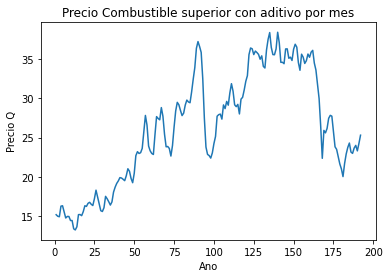

In [20]:
plt.plot(ts_sup_ad)
plt.gca().set(title="Precio Combustible superior con aditivo por mes", xlabel="Ano", ylabel="Precio Q")
plt.show()

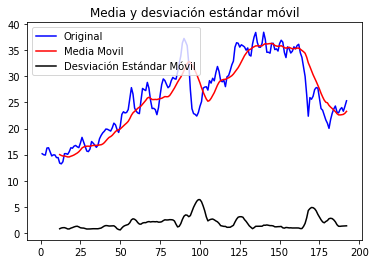

In [21]:
# Se calcula la media móvil y la desviación estandar móvil de los últimos 12 meses.
mediaMovil = ts_sup_ad.rolling(window=12).mean()
deMovil = ts_sup_ad.rolling(window=12).std()
# Se grafican los resultados.
original = plt.plot(ts_sup_ad, color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(deMovil,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

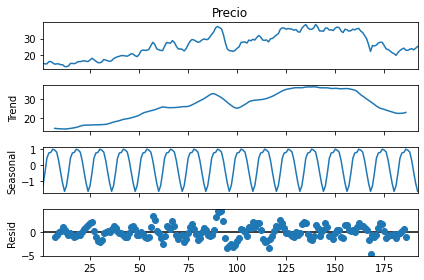

In [22]:
#ts_sup_ad = pd.Series(, index=pd.to_datetime(your_time_index))

# Perform seasonal decomposition
descomposicion = sm.tsa.seasonal_decompose(ts_sup_ad, period=12)

# Plot the decomposed components
descomposicion.plot()

# Show the plot
plt.show()

Podemos apreciar la existencia de tendencia por lo que la serie no parece ser estacionaria en media y tampoco en varianza.

# Estimar los parametros del modelo

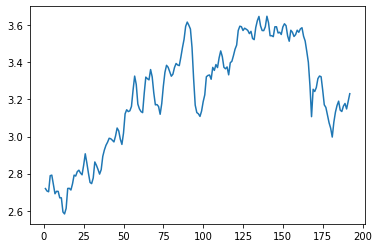

In [23]:
# aplicamos una transformacion logaritmica al set de datos
ts_sup_ad_log = np.log(ts_sup_ad)
#graficamos el set transformado
plt.plot(ts_sup_ad_log)

Podemos apreciar que la transformación logaritmica reduce significativamente la variabilidad de los datos, ya que antes de transformarlos, los datos oscilaban desde valores de Q40 a valores de Q15 -un rango de Q25-. Mientras que posterior a la transformación logaritmica, los datos tienen una variabilidad desde 2.6 hasta 3.6 -un rando de apenas 1-.

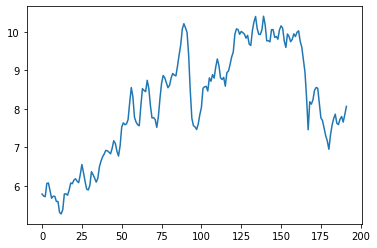

In [24]:
# usamos la transformacion de boxcox
ts_sup_ad_boxcox = stats.boxcox(ts_sup_ad, lmbda = 0.5)
plt.plot(ts_sup_ad_boxcox)

Al probar la transformación de Boxcox, con distintos valores de lambda, vemos que la variabilidad de los datos si disminuye pero no significativamente mejor que la transformación logaritmica. Por ende, trabajaremos con los datos transformados logaritmicamente.

## Prueba Dickey Fuller
La prueba Dickey-Fuller permite aceptar o rechazar la hipótesis de la existencia de raíces unitarias; permitiendos concluir si la serie es o no estacionaria en media.

In [25]:
print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(ts_sup_ad, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estadístico de prueba         -2.057095
p-value                        0.262113
# de retardos usados          11.000000
# de observaciones usadas    180.000000
Critical Value (1%)           -3.467211
Critical Value (5%)           -2.877735
Critical Value (10%)          -2.575403
dtype: float64


In [26]:
print(0.262113>0.05)

True


Como se puede observar, el valor p es mayor a 0.05. Por lo tanto, no podemos rechazar la hipótesis nula; concluyendo así que la serie no es estacionaria en media. Para remediar la situación, probamos realizando diferenciaciones al set de datos. 

In [27]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
ts_sup_ad_diff = ts_sup_ad.diff()
ts_sup_ad_diff.dropna(inplace=True)
dfTest = adfuller(ts_sup_ad_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba         -3.839567
p-value                        0.002527
# de retardos usados          10.000000
# de observaciones usadas    180.000000
Critical Value (1%)           -3.467211
Critical Value (5%)           -2.877735
Critical Value (10%)          -2.575403
dtype: float64


In [28]:
print(0.002527>0.05)

False


Posterior a la diferenciación, vemos que el p-value si satisface la condición. Por ende, el set de datos con una diferenciación es estacionaria en media. Al ser necesaria una sola diferenciación, tenemos que d=1.

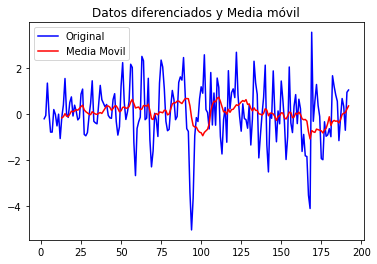

In [29]:
# graficamos los datos con una direfenciacion
mediaMovil = ts_sup_ad_diff.rolling(window=12).mean()
original = plt.plot(ts_sup_ad_diff, color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
plt.legend(loc = 'best')
plt.title('Datos diferenciados y Media móvil')
plt.show(block=False)
#plt.plot(ts_sup_ad_diff)

Podemos apreciar que los datos, en efecto, son estacionarios en media ya que la media móvil se asemeja a una recta.

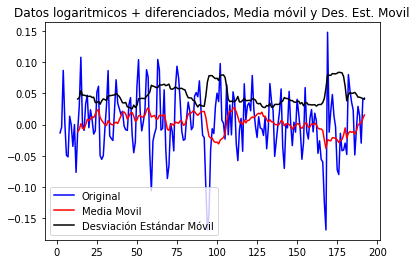

In [30]:
# aplicamos una diferenciacion a los datos transformados logaritmicamente
mediaMovil = ts_sup_ad_log.diff().rolling(window=12).mean()
deMovil = ts_sup_ad_log.diff().rolling(window=12).std()
original = plt.plot(ts_sup_ad_log.diff(), color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(deMovil,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Datos logaritmicos + diferenciados, Media móvil y Des. Est. Movil')
plt.show(block=False)

Podemos apreciar que los datos, posterior a ser transformados logaritmicamente y diferenciados, son estacionarios tanto en media como varianza. 

## Funciones de Autocorrelación

In [31]:
# guardamos los datos transformados log y diferenciados
ts_sup_ad_log_diff = ts_sup_ad_log.diff()
# eliminamos los na
ts_sup_ad_log_diff.dropna(inplace = True)
# usamos el autocorrelation function
tsa_acf = acf(ts_sup_ad_log_diff,nlags=5,fft=False)
# usamos el partial autocorrelation function
tsa_pacf = pacf(ts_sup_ad_log_diff, nlags=36)

#tsa_acf

/var/folders/04/fryprmks7_573d9qxr1s6bjh0000gn/T/ipykernel_997/983154301.py:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(acf(ts_sup_ad_log_diff, nlags=12, fft=False), use_line_collection=True)
/var/folders/04/fryprmks7_573d9qxr1s6bjh0000gn/T/ipykernel_997/983154301.py:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(acf(ts_sup_ad_log_diff, nlags=120, fft=False), use_line_collection=True)


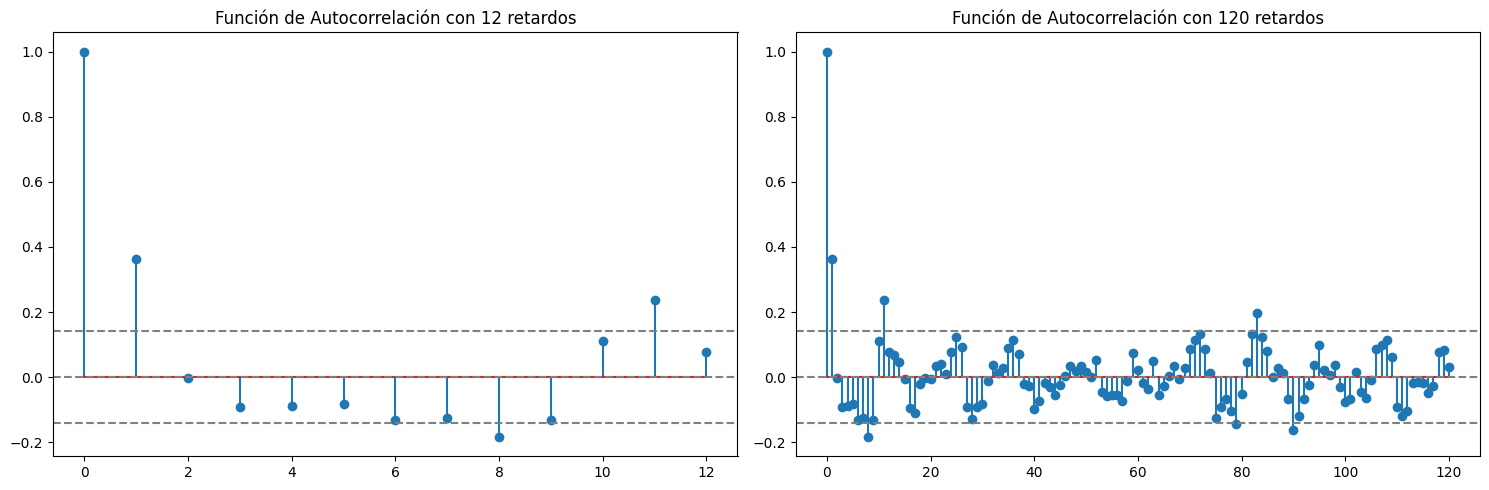

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined ts_globalLandTemp_boxcox and acf

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100

# Plot ACF with lines connecting each value
plt.subplot(121) 
plt.stem(acf(ts_sup_ad_log_diff, nlags=12, fft=False), use_line_collection=True)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_sup_ad_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_sup_ad_log_diff)), linestyle='--', color='gray')
plt.title('Función de Autocorrelación con 12 retardos')

plt.subplot(122) 
plt.stem(acf(ts_sup_ad_log_diff, nlags=120, fft=False), use_line_collection=True)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_sup_ad_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_sup_ad_log_diff)), linestyle='--', color='gray')
plt.title('Función de Autocorrelación con 120 retardos')

plt.tight_layout()
plt.show()

/var/folders/04/fryprmks7_573d9qxr1s6bjh0000gn/T/ipykernel_997/1729091834.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(pacf_values, markerfmt='o', basefmt=' ', linefmt='b-', use_line_collection=True)


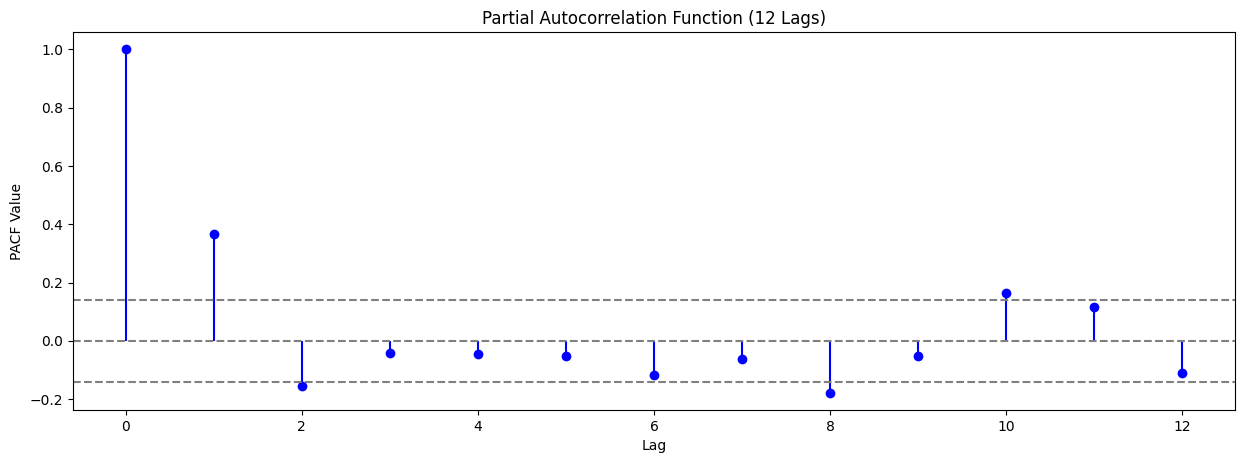

In [33]:
pacf_values = pacf(ts_sup_ad_log_diff, nlags=12)

# Create the PACF plot with connecting lines
plt.stem(pacf_values, markerfmt='o', basefmt=' ', linefmt='b-', use_line_collection=True)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_sup_ad_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_sup_ad_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function (12 Lags)')
plt.xlabel('Lag')
plt.ylabel('PACF Value')
plt.show()

/var/folders/04/fryprmks7_573d9qxr1s6bjh0000gn/T/ipykernel_997/3979498918.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(pacf_values, markerfmt='o', basefmt=' ', linefmt='b-', use_line_collection=True)


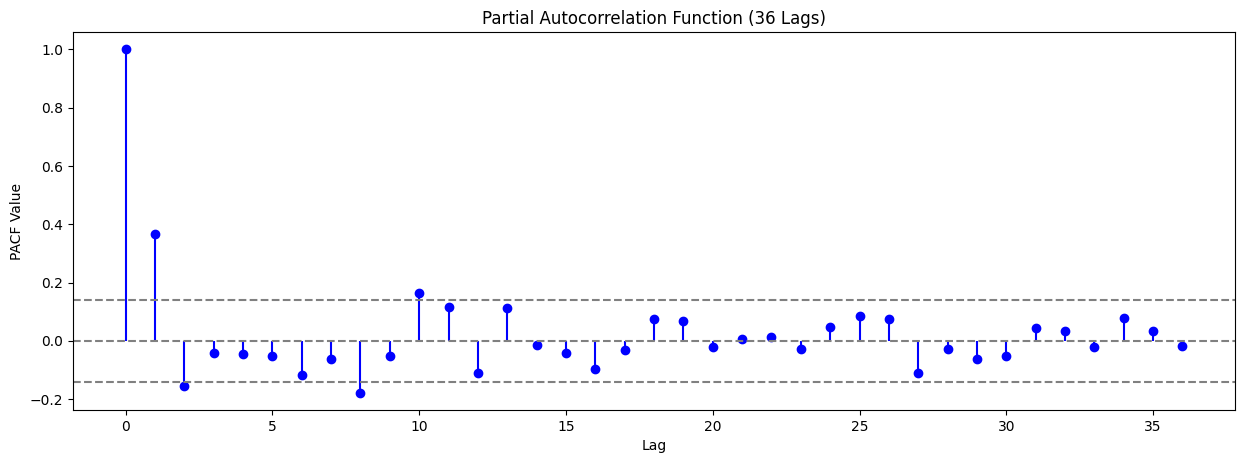

In [34]:
pacf_values = pacf(ts_sup_ad_log_diff, nlags=36)

# Create the PACF plot with connecting lines
plt.stem(pacf_values, markerfmt='o', basefmt=' ', linefmt='b-', use_line_collection=True)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_sup_ad_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_sup_ad_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function (36 Lags)')
plt.xlabel('Lag')
plt.ylabel('PACF Value')
plt.show()

A partir de los gráficos de ACF y PACF, se intuye que se trata de un modelo teórico similar a un ARMA.
Por ende, consideramos los modelos ARIMA:
- p=1, q=1
- p=2, q=1
  
Puesto que fue requerida una única diferenciación, tenemos que d=1.

## Estacionalidad

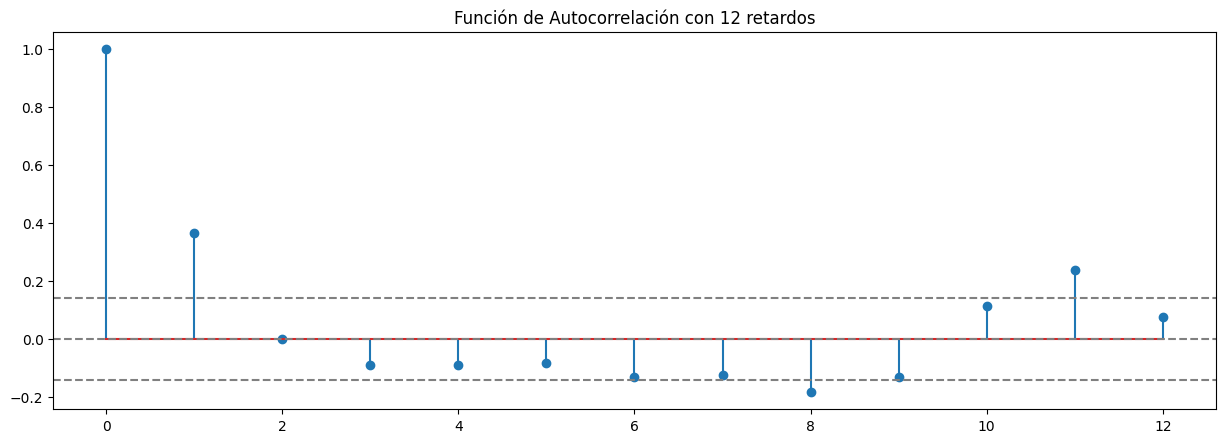

In [35]:
# grafico de autocorrelacion con 12 lags
plt.stem(acf(ts_sup_ad_log_diff,nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_sup_ad_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_sup_ad_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

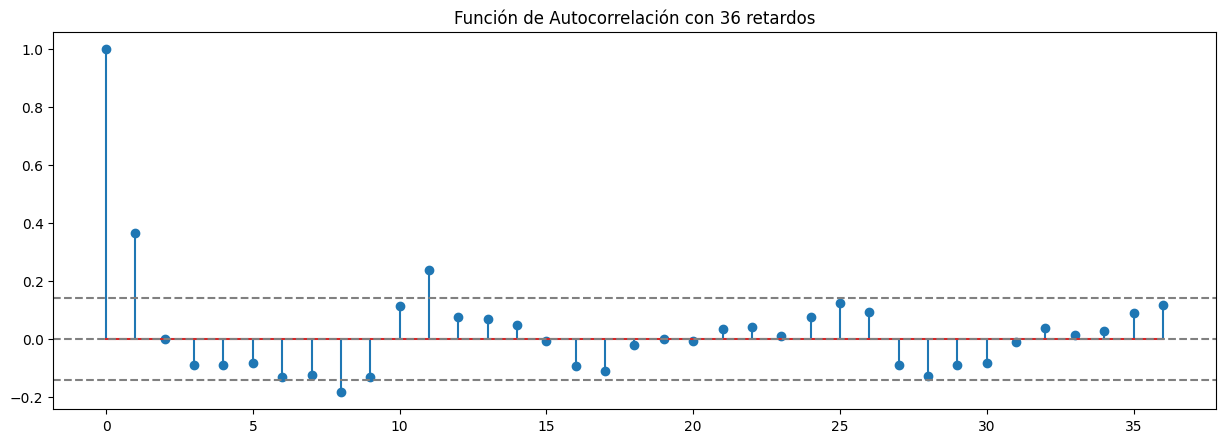

In [36]:
# grafico de autocorrelacion con 12 lags
plt.stem(acf(ts_sup_ad_log_diff,nlags=36,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_sup_ad_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_sup_ad_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 36 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

Al analizar la estacionalidad del modelo, podemos apreciar que la misma es inexistente.

## Modelo

In [37]:
# usamos un modelo p=1, d=1, q=1 
modelo111 = SARIMAX(ts_sup_ad_log, order=(1,1,1), enforce_stationarity=False, enforce_invertibility=False)
resultado_m111 = modelo111.fit()
print(resultado_m111.summary().tables[1])


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65737D+00    |proj g|=  2.08997D-01

At iterate    5    f= -1.65739D+00    |proj g|=  1.95731D-02

At iterate   10    f= -1.65740D+00    |proj g|=  2.29858D-03

At iterate   15    f= -1.65740D+00    |proj g|=  2.89545D-02

At iterate   20    f= -1.65740D+00    |proj g|=  3.63761D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   2.015D-03  -1.657D+00
  F =  -1.6574016255169137     

CONVERG

 This problem is unconstrained.


## Análisis de Residuos

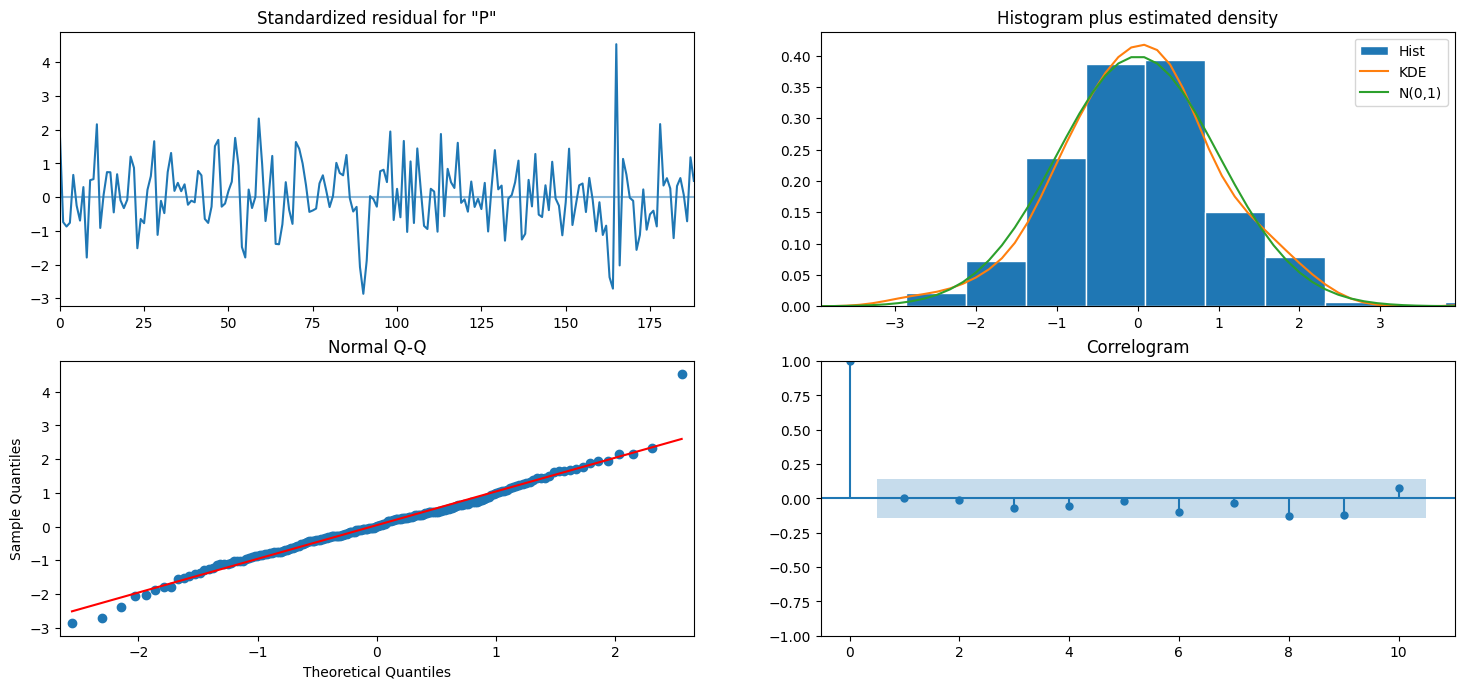

In [38]:
resultado_m111.plot_diagnostics(figsize=(18, 8))
plt.show()

En el correlograma no se pueden apreciar autocorrelaciones significativas. Asimismo, los residuos describen una distribución normal y tienen el comportamiento de ruido blanco.

In [39]:
# modelo p=2, d=1, q=1 
modelo211 = SARIMAX(ts_sup_ad_log, order=(2,1,1), enforce_stationarity=False, enforce_invertibility=False)
resultado_m211 = modelo211.fit()
print(resultado_m211.summary().tables[1])


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66180D+00    |proj g|=  2.18667D-01

At iterate    5    f= -1.66183D+00    |proj g|=  6.17955D-02

At iterate   10    f= -1.66187D+00    |proj g|=  6.39921D-02

At iterate   15    f= -1.66200D+00    |proj g|=  1.04155D-01

At iterate   20    f= -1.66206D+00    |proj g|=  2.40365D-01

At iterate   25    f= -1.66367D+00    |proj g|=  1.41284D+00

At iterate   30    f= -1.66478D+00    |proj g|=  1.59462D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


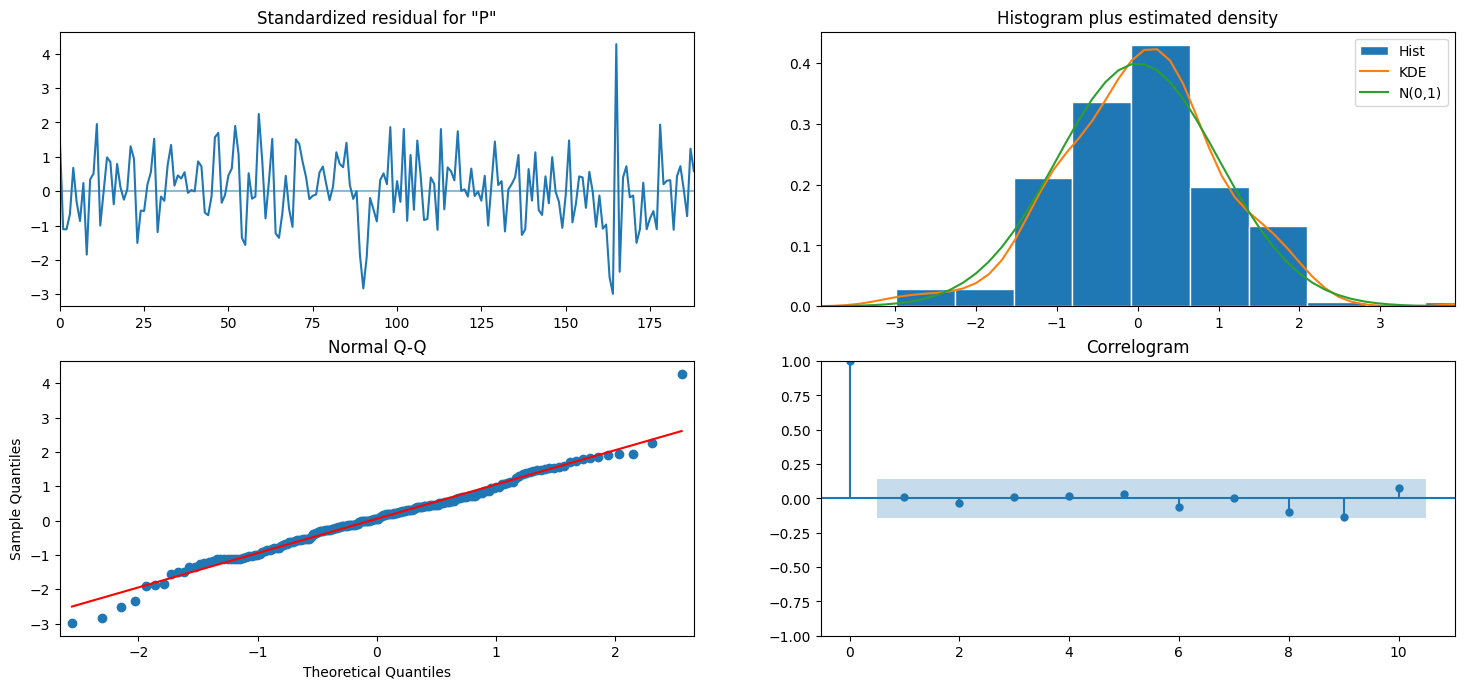

In [40]:
resultado_m211.plot_diagnostics(figsize=(18, 8))
plt.show()

En el correlograma no se pueden apreciar autocorrelaciones significativas. Asimismo, los residuos describen una distribución normal y tienen el comportamiento de ruido blanco.

In [41]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 111=",resultado_m111.aic)
print("Modelo 211=",resultado_m211.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 111=",resultado_m111.bic)
print("Modelo 211=",resultado_m211.bic)

Resultados de AIC (Akaike information criterion)
Modelo 111= -630.4422241984948
Modelo 211= -631.2774428307323
Resultados de BIC (Bayesian information criterion)
Modelo 111= -620.7169831533159
Modelo 211= -618.3104547704937


En el AIC test vemos que el mejor modelo es el 211 y en el BIC, el mejor modelo es el modelo 111. Sin embargo, la diferencia entre ambos modelos para el AIC es muy pequeña. Por ende, consideramos como mejor modelo el modelo 111.

## Predicción

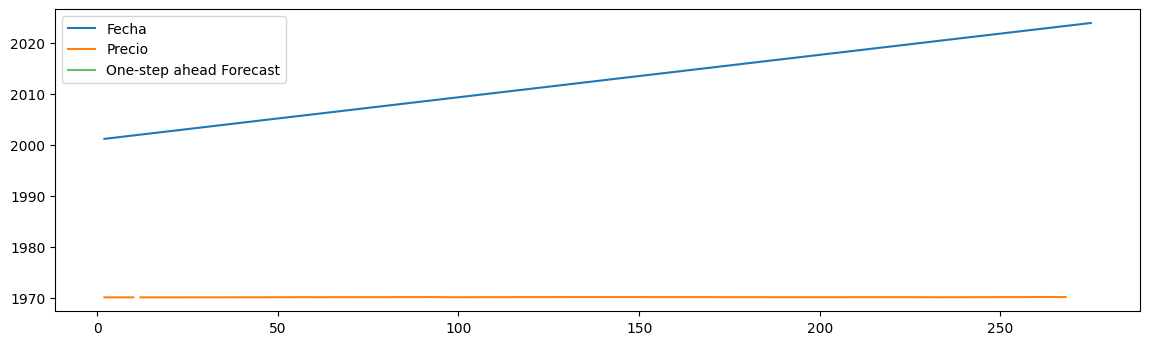

In [42]:
pred = resultado_m111.get_prediction(start=test_sup_ad.index[0], dynamic=False)
pred_ci = pred.conf_int()
ax = datos_gas_sup_ad[2:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between( pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)
#ax.set_xlabel('Date')
#ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

pred

# Gasolina Regular y Diesel

In [ ]:
# creamos un dataframe leyendo la segunda hoja del excel
df2 = pd.read_excel("Precios-Mensuales-promedio-combustibles-Ciudad-de-Guatemala-mayo-2023-SERVICIO-COMPLETO.xlsx", skiprows=[0], sheet_name="Table 2")
#df2

In [ ]:
df2
df2.reset_index(drop=True, inplace=True)
df2.drop("Unnamed: 1", axis=1, inplace=True)
#df2

In [ ]:
# separamos el dataframe en dos; uno para los datos de la gasolina regular y otro para los datos de diesel
gasolina_regular = df2.iloc[0:12]
diesel = df2.iloc[17:29]

In [ ]:
# mostramos los datos de gasolina regular
gasolina_regular

In [ ]:
# mostramos los datos de diesel
diesel

## Series de Tiempo Gasolina Regular y Diesel